# The overall workflow in 'Breast_Cancer_ML_Baseline'
## 1. Naive Case
## 2. Baseline Models
## 3. Conclusions - Model selection
## 4. Next Steps

# Packages

In [1]:
import pandas as pd
from Breast_Cancer_Functions import final_preprocess, train_predict
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Machine learning algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb 
import lightgbm as lgb

/Users/kevin/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# 1. Naive Case
- If I have a naive model, which is when a patient comes in, I always predict her as having breast cancer. In the real scenario, having such guessing is extremely terrible! Patients will feel panic if they truly don't have breast cancer! 
- The purpose of demonstrating this naive case is to illustrate that imagining I don't have an intelligent model guiding me solutions. Also, in the following steps, I can compare my model performance with the naive case, and see how much I can improve!

In [2]:
data = pd.read_csv('data.csv')

- To compute how much my naive model can achieve, I draw a confusion matrix below:
    - Pred P: Predict as positive groups (have breast cancer).
    - Pred N: Predict as negative groups (doesn't breast cancer).
    - P: Originally, patients are diagnosed as having breast cancer.
    - N: Originally, patients are diagnosed as not having breast cancer.

| Confusion Matrix | Pred P | Pred N
| -- | -- | -- 
| **P** | 212 | 0
| **N** | 357 | 0


In [9]:
# The dataset contains 212 records as positive groups and 357 as negative groups.
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [3]:
# Calculate accuracy, precision and recall.
TP = 212
FP = 357
TN = 0
FN = 0

# Metrics.
accuracy = (TP+TN)/569
recall = TP/(TP+FN)
precision = TP/(TP+FP)
fscore = (1+0.5**2) * ((precision*recall) / ((0.5**2)*precision+recall))

# Print the results.
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.3726, F-score: 0.4260]


# 2. Baseline Models

In [4]:
# final_preprocess function processed the original data.
train_standardized_data, test_standardized_data, y_train, y_test = final_preprocess(data=data)

In [5]:
# Initialize nine models with default parameters.

# Linear models (sigmoid activation).
lr_clf = LogisticRegression(random_state=0)
sgd_clf = SGDClassifier(random_state=0)

# Ensemble models.
dt_clf = DecisionTreeClassifier(random_state=0)
bag_dt_base_learner = DecisionTreeClassifier(random_state=0)
bag_dt_clf = BaggingClassifier(base_estimator=bag_dt_base_learner,
                                 random_state=0)
rf_clf = RandomForestClassifier(random_state=0)

# Boosting models.
ada_boost_base_learner = DecisionTreeClassifier(random_state=0)
ada_boost_clf = AdaBoostClassifier(base_estimator=ada_boost_base_learner,
                                     random_state=0)
gb_clf = GradientBoostingClassifier(random_state=0)
xbg_clf = xgb.XGBClassifier(random_state=0)
lgb_clf = lgb.LGBMClassifier(objective='binary',
                               random_state=0)

In [6]:
# Nine machine learning models.
clfs = [lr_clf,sgd_clf,
        dt_clf,bag_dt_clf,rf_clf,
        ada_boost_clf,gb_clf,xbg_clf,lgb_clf
       ]
# Collect results for later visualizations.
train_time = {}
pred_time = {}
train_accuracy = {}
train_f_score = {}
test_accuracy = {}
test_f_score = {}

# Loop through models.
for each in clfs:
    results = train_predict(learner=each, 
                            X_train=train_standardized_data, y_train=y_train, 
                            X_test=test_standardized_data, y_test=y_test)
    train_time[each.__class__.__name__] = results['train_time']
    pred_time[each.__class__.__name__] = results['pred_time']
    train_accuracy[each.__class__.__name__] = results['acc_train']
    train_f_score[each.__class__.__name__] = results['f_train']
    test_accuracy[each.__class__.__name__] = results['acc_test']
    test_f_score[each.__class__.__name__] = results['f_test']

/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LogisticRegression trained on 455 samples.
SGDClassifier trained on 455 samples.
DecisionTreeClassifier trained on 455 samples.
BaggingClassifier trained on 455 samples.
RandomForestClassifier trained on 455 samples.
AdaBoostClassifier trained on 455 samples.
GradientBoostingClassifier trained on 455 samples.
XGBClassifier trained on 455 samples.
LGBMClassifier trained on 455 samples.


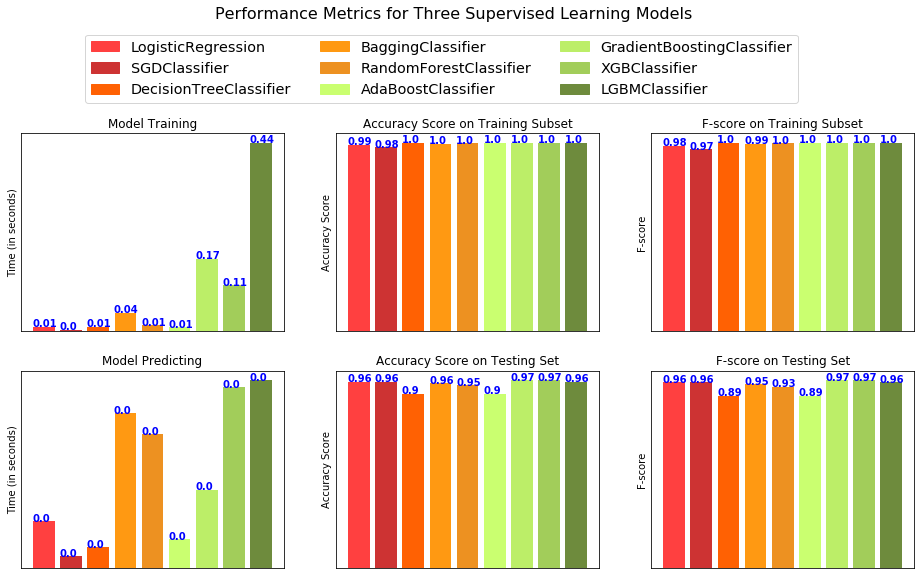

In [8]:
# Create figures.
fig, ax = plt.subplots(2, 3, figsize = (16,8))

# Constants.
bar_width = 0.3
colors = ['#FF4040','#CD3333',
          '#FF6103','#FF9912','#ED9121',
         '#CAFF70','#BCEE68','#A2CD5A','#6E8B3D']

# Bar plots (training part).
for i, result in enumerate([train_time,train_accuracy,train_f_score]):
    j = 1
    for key in result:
        ax[0,i].bar(j, result[key], color=colors[j-1])
        ax[0,i].set_xticklabels(["", "", ""])
        ax[0,i].text(j-0.42, result[key], str(round(result[key],2)), color='blue', fontweight='bold')
        ax[0,i].tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
        j+=1
        
# Bar plots (testing part).      
for i, result in enumerate([pred_time,test_accuracy,test_f_score]):
    j = 1
    for key in result:
        ax[1,i].bar(j, result[key], color=colors[j-1])
        ax[1,i].set_xticklabels(["", "", ""])
        ax[1,i].text(j-0.42, result[key], str(round(result[key],2)), color='blue', fontweight='bold')
        ax[1,i].tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
        j+=1
        
# Add unique y-labels.
ax[0, 0].set_ylabel("Time (in seconds)")
ax[0, 1].set_ylabel("Accuracy Score")
ax[0, 2].set_ylabel("F-score")
ax[1, 0].set_ylabel("Time (in seconds)")
ax[1, 1].set_ylabel("Accuracy Score")
ax[1, 2].set_ylabel("F-score")
    
# Add titles.
ax[0, 0].set_title("Model Training")
ax[0, 1].set_title("Accuracy Score on Training Subset")
ax[0, 2].set_title("F-score on Training Subset")
ax[1, 0].set_title("Model Predicting")
ax[1, 1].set_title("Accuracy Score on Testing Set")
ax[1, 2].set_title("F-score on Testing Set") 

# Legend.         
patches = []
for i, learner in enumerate(train_time.keys()):
    patches.append(mpatches.Patch(color = colors[i], label = learner))
plt.legend(handles = patches, bbox_to_anchor = (-.8, 2.7), \
          loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')

# Titles.
plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
plt.tight_layout()
plt.show()

# 3. Conclusions - Model selection
- SGDClassifier is the fastest model in terms of the training time it achieved in this project, while LGBMClassifier is a complex tree-based model and thus requires more resources to perform training.

- Accuracy scores between training and testing set: There is an overfitting issue occurred on models including Decision Tree Classifier and AdaBoost Classifier since they have the largest difference between training and test accuracy score compared with other classifiers.

- F-scores between training and testing sets: F-score is another useful metric detecting a classifier performance, especially when we have a highly unbalanced label distribution in our response variable. I have the same conclusion as above that Decision Tree Classifier and AdaBoost Classifier have an overfitting issue.

# 4. Next Steps
- Now, the question is: how do I select which model to be optimized in the next steps? The answer might be looking at which model achieved the highest accuracy score and F-score on the testing set. Furthermore, if they don't require too many time on training, then they will be the best candidate for the next steps!
- Accordingly, I chose Gradient Boosting Classifier and XGB Classifier since they both resulted in 0.97 accuracy and F-score on the testing set. Even though these two models need more training time compared with models such as SGDClassifier, I will sacrifice the time a little bit and go with models providing the optimal performance because I am predicting whether a patient has breast cancer or not!